We completed a series of 2 year WFD only runs over a grid of airmass bonus and hour angle bonus values. Each bonus was increased from 0 to 1 in steps of 0.1 while the other was held constant. The pandas dataframe below gives the run names along with their airmass and hour angle bonus values. There are also two runs (`colossus_2216,colossus_2217`) where both parameters were varied simultaneously. 

In [1]:
import pandas as pd

In [2]:
runs_df = pd.read_csv('colossus_runs.csv')

In [3]:
runs_df

,Colossus run,Airmas bonus,HA bosus
0,2218,0.00,0.00
1,2219,0.05,0.00
2,2194,0.10,0.00
3,2195,0.20,0.00
4,2196,0.30,0.00
5,2197,0.40,0.00
6,2198,0.50,0.00
7,2199,0.60,0.00
8,2200,0.70,0.00
9,2201,0.80,0.00


In [4]:
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

`MafRunComparison` allows us to connect to the results databases of multiple opsim runs and compile the summary statistics of a list of metrics into a single place. 

In [5]:
from lsst.sims.maf.web import MafRunComparison

/home/docmaf/stack/python/miniconda3-4.2.12/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [6]:
# Create list of runnames from the run_df dataframe
runnames = []
for r in runs_df['Colossus run']:
    runnames.append('colossus_' + str(r))

Here we use the `MafRunComparison` class to create a comparison object.

In [7]:
comp = MafRunComparison(baseDir='.', runlist=runnames)

The `combineSummaryStats` method inside of the `MafRunComparison` class prdouces a pandas dataframe of the summary statistics that is indexed by the opsim run name. 

In [8]:
stats_df,metricDict = comp.combineSummaryStats('WideFastDeep',['airmass_bonus','hour_angle_bonus'])


Querying Config parameters with the following query:
paramName like "%WideFastDeep%airmass_bonus%" or paramName like "%WideFastDeep%hour_angle_bonus%"


In [9]:
stats_df

,airmass_bonus,hour_angle_bonus,FullRange HA g band,FullRange HA i band,FullRange HA r band,FullRange HA u band,FullRange HA y band,FullRange HA z band,Mean Slew Time,Median CoaddM5 g band,...,Median Parallax Coverage 20,Median Parallax Coverage 24,Median Slew Time,Median seeingFwhmEff i band,Median seeingFwhmEff r band,Meidan Prop. Mo. 20,Meidan Prop. Mo. 24,Nights with Observations,Total Eff Time,Total Visits
colossus_2218,0.00,0.00,6.056031,6.771565,6.663179,6.196428,6.940468,6.917391,7.375384,26.132428,...,0.684531,0.661419,4.873600,0.894435,0.916118,1.435960,14.498901,585.0,72.630141,459683.0
colossus_2219,0.05,0.00,3.622805,4.379543,3.760879,3.725859,5.337724,4.986649,8.816727,26.257944,...,0.614269,0.575233,5.394508,0.835953,0.864102,1.457455,12.603595,585.0,87.108118,445243.0
colossus_2194,0.10,0.00,2.995913,3.613353,2.991662,3.006169,5.108316,4.508268,9.151659,26.287583,...,0.603861,0.558220,5.419684,0.822980,0.866558,1.492926,12.414559,585.0,89.958811,441767.0
colossus_2195,0.20,0.00,2.401453,3.095036,2.526786,2.435489,4.898545,4.100737,9.330695,26.238059,...,0.587205,0.529235,5.427112,0.818031,0.851308,1.526122,12.897825,585.0,92.336196,439951.0
colossus_2196,0.30,0.00,2.282284,2.884388,2.308614,2.071561,4.871987,3.840201,9.180633,26.273308,...,0.576638,0.532723,5.436533,0.819396,0.848465,1.530625,12.858694,585.0,94.298682,441468.0
colossus_2197,0.40,0.00,2.153509,2.785946,2.176915,1.987237,4.667224,3.830848,9.066842,26.262516,...,0.575323,0.546664,5.449712,0.815769,0.844690,1.533811,12.939018,585.0,95.595542,442678.0
colossus_2198,0.50,0.00,2.058278,2.680086,2.062338,1.819176,4.479508,3.728432,9.033214,26.272555,...,0.571793,0.534062,5.466523,0.812383,0.835066,1.521700,12.968738,585.0,96.434540,442999.0
colossus_2199,0.60,0.00,2.026894,2.582308,2.034438,1.821842,4.658286,3.731214,9.054509,26.289817,...,0.568227,0.529713,5.485244,0.825684,0.832283,1.507107,13.227720,585.0,97.016389,442800.0
colossus_2200,0.70,0.00,1.947006,2.500222,2.062006,1.731847,4.555519,3.550731,9.064226,26.308938,...,0.570318,0.508336,5.503190,0.813773,0.849418,1.496522,12.928898,585.0,98.808211,442692.0
colossus_2201,0.80,0.00,1.927886,2.508354,2.028216,1.744324,4.362445,3.611486,8.975389,26.284514,...,0.564411,0.519591,5.523535,0.811644,0.840937,1.487637,13.391933,585.0,99.457093,443605.0


For plotting purposes we will split the `stats_df` dataframe into two additional dataframes:

* airmass_df all runs where the hour angle bonus is 0.
* hourangle_df all runs where the airmass bonus is 0.

In [10]:
airmass_df = stats_df[(stats_df.airmass_bonus >= 0) & (stats_df.hour_angle_bonus == 0.0 )]
hourangle_df = stats_df[(stats_df.airmass_bonus == 0) & (stats_df.hour_angle_bonus >= 0.0 )]

In order to show multiple metrics on one plot we normalize the metric values to the opsim run where both bonus parameters were zero. In this case that is `colussus_2218`

The normalized values are calculated as follows:

$$\mathrm{normalized\;value} = \frac{\mathrm{value(run)} - \mathrm{value(colussus\;2218)}}{\mathrm{value(colussus\; 2218)}}$$

The `nomalizeRun` function below will perform this calculation for all of the rows in a dataframe but not include the airmass bonus and hour angle bonus columns.

In [11]:
def nomalizeRun(rundf,parameterList,baselineRun):
    nparameters = len(parameterList)
    noramlize = ((rundf.iloc[:, nparameters:] - rundf.iloc[:, nparameters:].loc[baselineRun].values.squeeze())/
                 rundf.iloc[:, nparameters:].loc[baselineRun].values.squeeze())
    noramlizedf = pd.concat([rundf.iloc[:, 0:nparameters],noramlize], axis=1, 
                            join_axes=[rundf.iloc[:, 0:nparameters].index])
    return noramlizedf

In [12]:
norm_hour_angle_df = nomalizeRun(hourangle_df,['airmass_bonus','hour_angle_bonus'],'colossus_2218')
norm_airmass_df = nomalizeRun(airmass_df,['airmass_bonus','hour_angle_bonus'],'colossus_2218')
parameterList = ['airmass_bonus','hour_angle_bonus']

Once we have produced these dataframes it is easy to plot the results in a number of different ways. Below we will illustrate just a few of the potential options.

In [13]:
def standardCompPlots(dataframe,parameterList,xaxis,xlabel,ylabel,output=None):
    # A function to plot the normalized summary stats values as a function
    # of either airmass bonus or hour angle bonus.
    magcols = [col for col in dataframe.columns if 'M5' in col]
    HAcols = [col for col in dataframe.columns if 'HA' in col]
    propMocols  = [col for col in dataframe.columns if 'Prop. Mo.' in col]
    parallaxCols = [col for col in dataframe.columns if 'Parallax' in col]
    seeingcols  = [col for col in dataframe.columns if 'seeing' in col]
    othercols = ['Mean Slew Time', 'Median Slew Time','Median NVists Per Night',
                 'Median Open Shutter Fraction','Nights with Observations', 'Total Eff Time',
                 'Total Visits']
    
    colsets = [othercols,magcols,HAcols,propMocols,parallaxCols,seeingcols]
    fig, axs = plt.subplots(len(colsets),1, figsize=(6, 20))
    axs = axs.ravel()
    for i,c in enumerate(colsets):
        for j,metric in enumerate(dataframe[c].columns):
            cmap = plt.cm.get_cmap('gist_rainbow_r')
            axs[i].plot(dataframe[xaxis],dataframe[metric],
                     marker='.',ms=10,color=cmap(j/(len(c))),label=metric)
            axs[i].grid(True)
            axs[i].set_xlabel(xlabel)
            axs[i].set_ylabel(ylabel)
            lgd = axs[i].legend(loc=(1.02, 0.2),ncol=1)
    
    if output:
        plt.savefig(output, bbox_extra_artists=(lgd,), bbox_inches='tight')
    

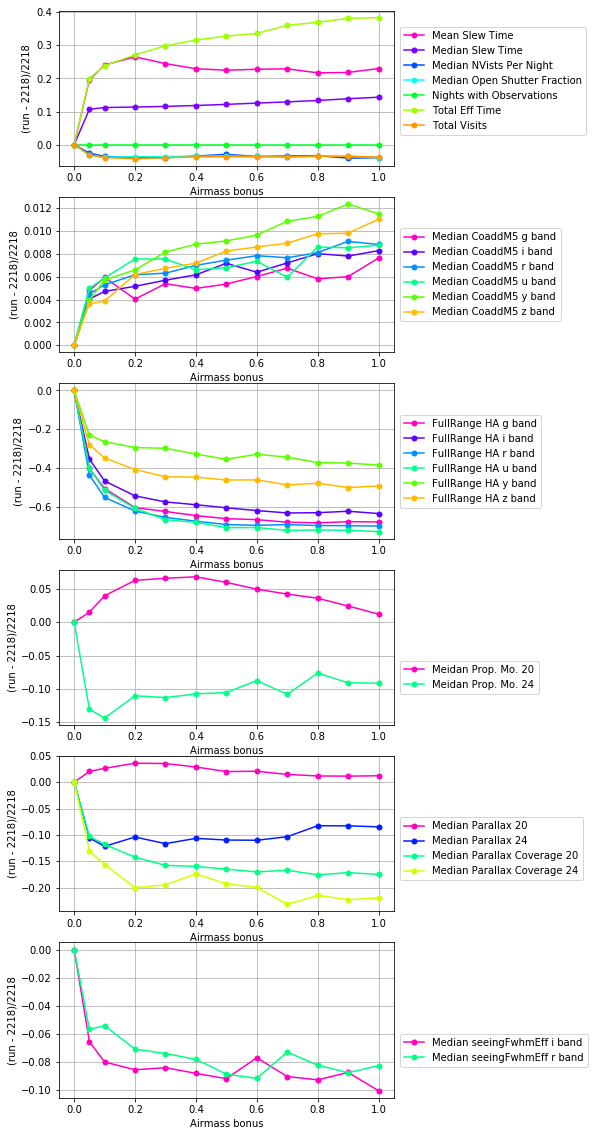

In [14]:
standardCompPlots(norm_airmass_df,parameterList,xaxis='airmass_bonus',
                  xlabel='Airmass bonus',ylabel='(run - 2218)/2218')

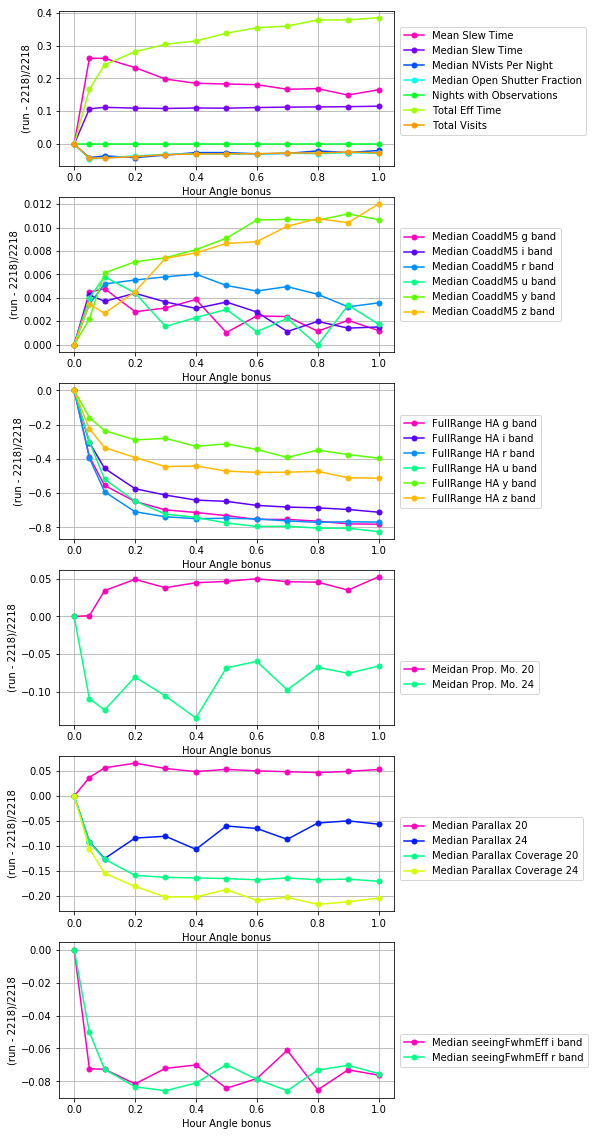

In [15]:
standardCompPlots(norm_hour_angle_df,['airmass_bonus','hour_angle_bonus'],
                  'hour_angle_bonus','Hour Angle bonus','(run - 2218)/2218')

In [16]:
stats_df_norm = nomalizeRun(stats_df,parameterList,'colossus_2218')

You can also plot all of the runs togeher in the following fashion

In [17]:
def standardrunCompPlots(dataframe,ylabel,output=None,totalVisits=True):
    magcols = [col for col in dataframe.columns if 'M5' in col]
    HAcols = [col for col in dataframe.columns if 'HA' in col]
    propMocols  = [col for col in dataframe.columns if 'Prop. Mo.' in col]
    seeingcols  = [col for col in dataframe.columns if 'seeing' in col]
    parallaxCols = [col for col in dataframe.columns if 'Parallax' in col]
    if totalVisits == True:
        othercols = ['Mean Slew Time', 'Median Slew Time','Median NVists Per Night',
                     'Median Open Shutter Fraction','Nights with Observations', 'Total Eff Time',
                     'Total Visits']
    else:
        othercols = ['Mean Slew Time', 'Median Slew Time','Median NVists Per Night',
                     'Median Open Shutter Fraction']
    colsets = [othercols,magcols,HAcols,propMocols,parallaxCols,seeingcols]
    fig, axs = plt.subplots(len(colsets),1, figsize=(8, 33))
    fig.subplots_adjust(hspace=.4)
    axs = axs.ravel()
    for i,c in enumerate(colsets):
        x = np.arange(len(dataframe))
        for metric in dataframe[c].columns:
            axs[i].plot(x,dataframe[metric],marker='.',ms=10,label=metric)
        axs[i].grid(True)
        axs[i].set_ylabel(ylabel)
        lgd = axs[i].legend(loc=(1.02, 0.2),ncol=1)
        plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=90)
        plt.setp(axs[i],xticks=x,xticklabels=[x.strip('') for x in dataframe.index.values])
    if output:
        plt.savefig(output, bbox_extra_artists=(lgd,), bbox_inches='tight')

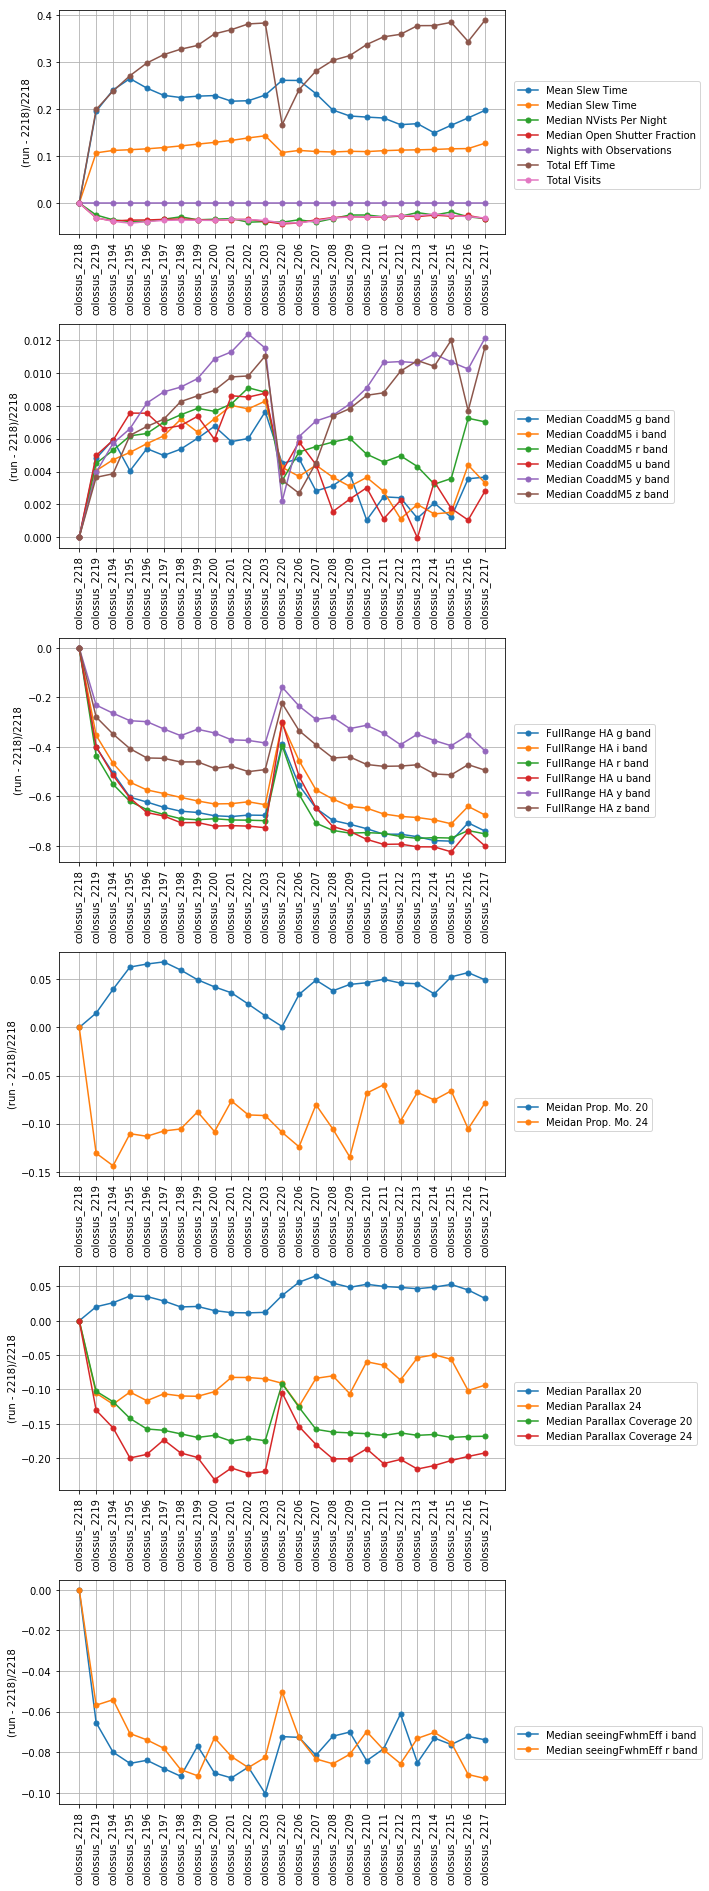

In [18]:
standardrunCompPlots(stats_df_norm,ylabel='(run - 2218)/2218')

In [19]:
from lsst.sims.maf.db import OpsimDatabaseV4
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots
import lsst.sims.maf.utils as utils

In [20]:
def overplotOneDHistograms(dataframe,outDirs,metricName,metadata=None,opsim=False,logScale=False,normalize=False):
    runNames = dataframe.index
    cmap = plt.cm.get_cmap('gist_rainbow_r')
    bundles = {}
    p = plots.OneDBinnedData()
    maxYvalues = np.ones(len(runNames)) 
    for i,run in enumerate(runNames):
        if metadata:
            metadatastr = '_'+metadata
        else:
            metadatastr = ''
        if opsim:
            metricFile = 'opsim'+'_'+metricName+metadatastr+'_ONED'+'.npz'
        else:
            metricFile = run+'_'+metricName+metadatastr+'_ONED'+'.npz'
        bundles[run] = metricBundles.createEmptyMetricBundle()
        bundles[run].read(run+outDirs[i]+metricFile)
        maxYvalues[i] = bundles[run].metricValues.compressed().max()
    for k,runPlot in enumerate(runNames):
        label = "%s %.2f %.2f" % (runPlot,dataframe.loc[runPlot]['airmass_bonus'],
                                  dataframe.loc[runPlot]['hour_angle_bonus'])
        if normalize == False:
            metricValues = bundles[runPlot].metricValues
            yMax = np.max(maxYvalues)
        else:
            metricValues = (bundles[runPlot].metricValues)/(bundles[runPlot].metricValues.compressed().max())
            yMax = 1.1   
        p(metricValues, slicer=bundles[runPlot].slicer,
          userPlotDict={'color': cmap(k/len(runNames)),
                        'label':label,'linewidth':3,
                        'yMax':yMax,
                        'logScale': logScale},fignum=1)
        

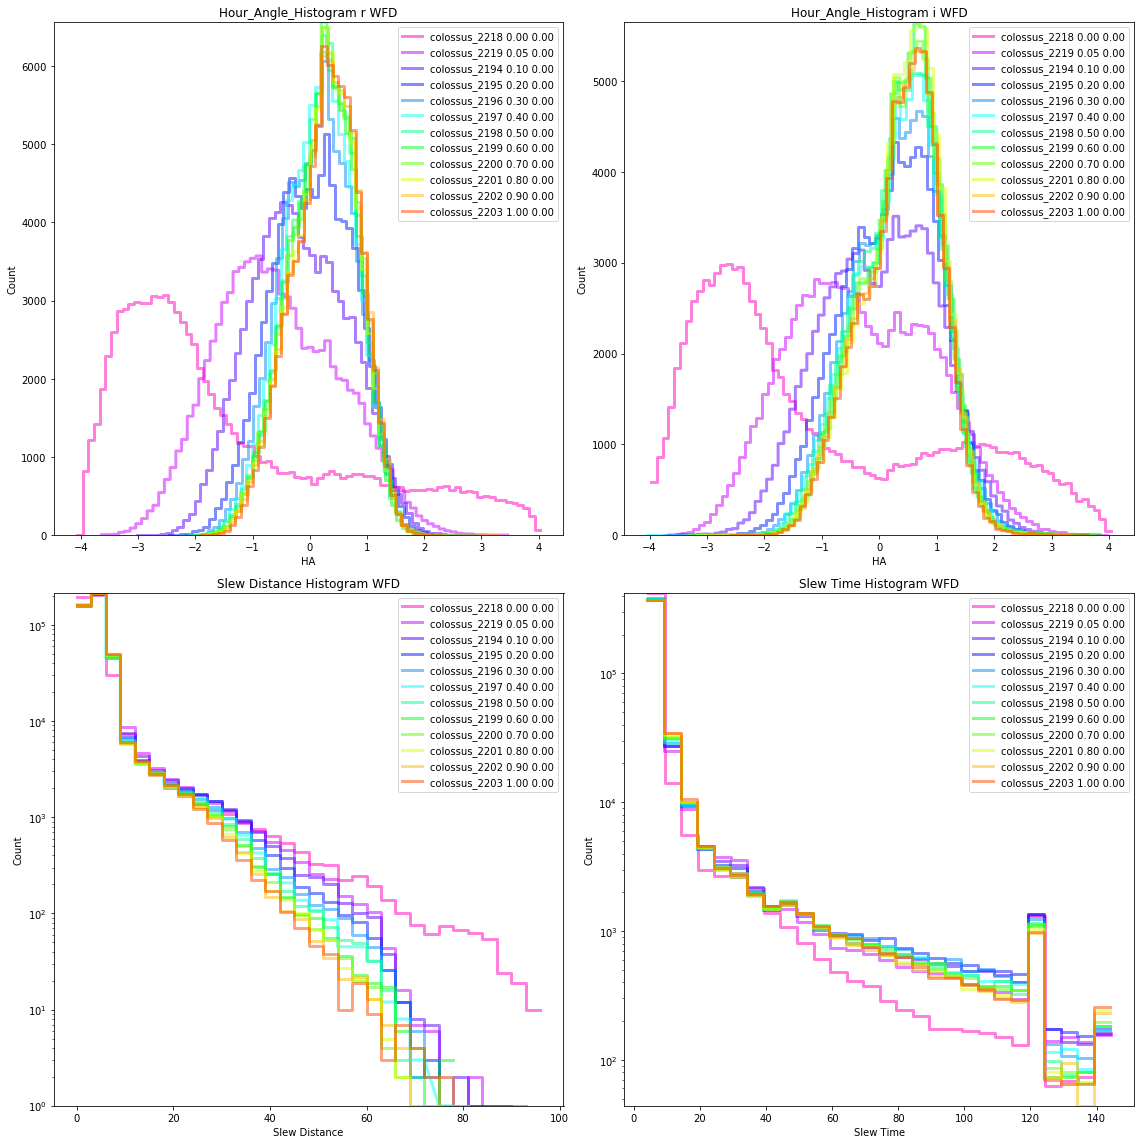

In [21]:
plt.figure(figsize=(16,16))
ax1 = plt.subplot(221)
overplotOneDHistograms(airmass_df,['/sched/']*len(airmass_df.index),
                       'Hour_Angle_Histogram','r_band_all_props',opsim=False)
ax1.set_xlabel('HA')
ax1.set_ylabel('Count')
ax1.set_title('Hour_Angle_Histogram r WFD')
ax1.legend()

ax2 = plt.subplot(222)
overplotOneDHistograms(airmass_df,['/sched/']*len(airmass_df.index),
                       'Hour_Angle_Histogram','i_band_all_props',opsim=False)
ax2.set_xlabel('HA')
ax2.set_ylabel('Count')
ax2.set_title('Hour_Angle_Histogram i WFD')
ax2.legend()

ax3 = plt.subplot(223)
overplotOneDHistograms(airmass_df,['/sched/']*len(airmass_df.index),
                       'Slew_Distance_Histogram',opsim=True,logScale=True)
ax3.set_xlabel('Slew Distance')
ax3.set_ylabel('Count')
ax3.set_title('Slew Distance Histogram WFD')
ax3.legend()

ax4 = plt.subplot(224)
overplotOneDHistograms(airmass_df,['/sched/']*len(airmass_df.index),
                       'Slew_Time_Histogram',opsim=True,logScale=True)
ax4.set_xlabel('Slew Time')
ax4.set_ylabel('Count')
ax4.set_title('Slew Time Histogram WFD')
ax4.legend()
plt.tight_layout()
plt.savefig('airmass_bonus_comparisons.pdf')

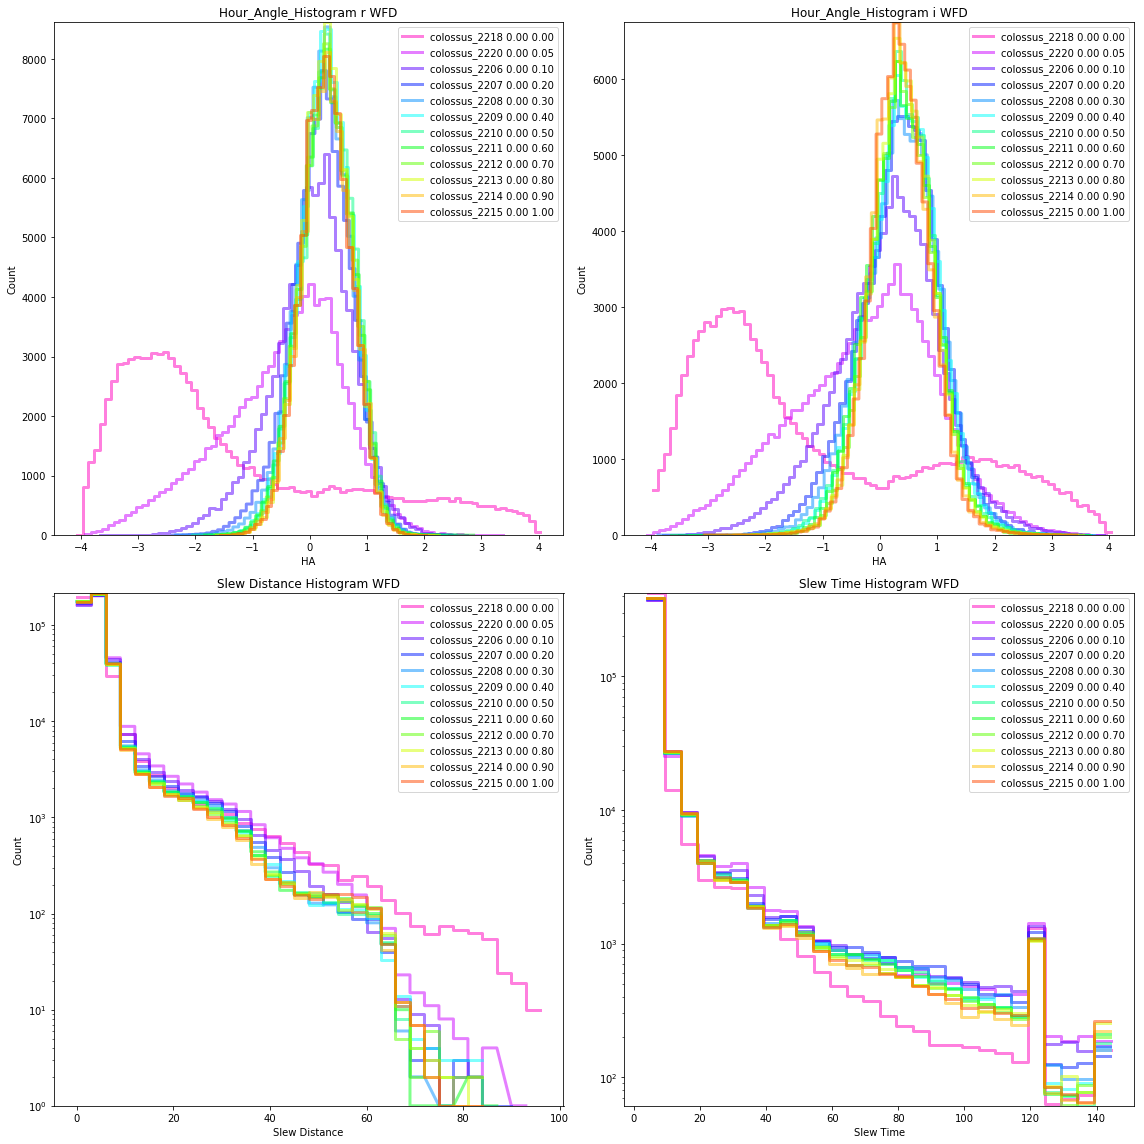

In [22]:
plt.figure(figsize=(16,16))
ax1 = plt.subplot(221)
overplotOneDHistograms(hourangle_df,['/sched/']*len(hourangle_df.index),
                       'Hour_Angle_Histogram','r_band_all_props',opsim=False)
ax1.set_xlabel('HA')
ax1.set_ylabel('Count')
ax1.set_title('Hour_Angle_Histogram r WFD')
ax1.legend()

ax2 = plt.subplot(222)
overplotOneDHistograms(hourangle_df,['/sched/']*len(hourangle_df.index),
                       'Hour_Angle_Histogram','i_band_all_props',opsim=False)
ax2.set_xlabel('HA')
ax2.set_ylabel('Count')
ax2.set_title('Hour_Angle_Histogram i WFD')
ax2.legend()

ax3 = plt.subplot(223)
overplotOneDHistograms(hourangle_df,['/sched/']*len(hourangle_df.index),
                       'Slew_Distance_Histogram',opsim=True,logScale=True)
ax3.set_xlabel('Slew Distance')
ax3.set_ylabel('Count')
ax3.set_title('Slew Distance Histogram WFD')
ax3.legend()

ax4 = plt.subplot(224)
overplotOneDHistograms(hourangle_df,['/sched/']*len(hourangle_df.index),
                       'Slew_Time_Histogram',opsim=True,logScale=True)
ax4.set_xlabel('Slew Time')
ax4.set_ylabel('Count')
ax4.set_title('Slew Time Histogram WFD')
ax4.legend()
plt.tight_layout()
plt.savefig('hourangle_bonus_comparison.pdf')

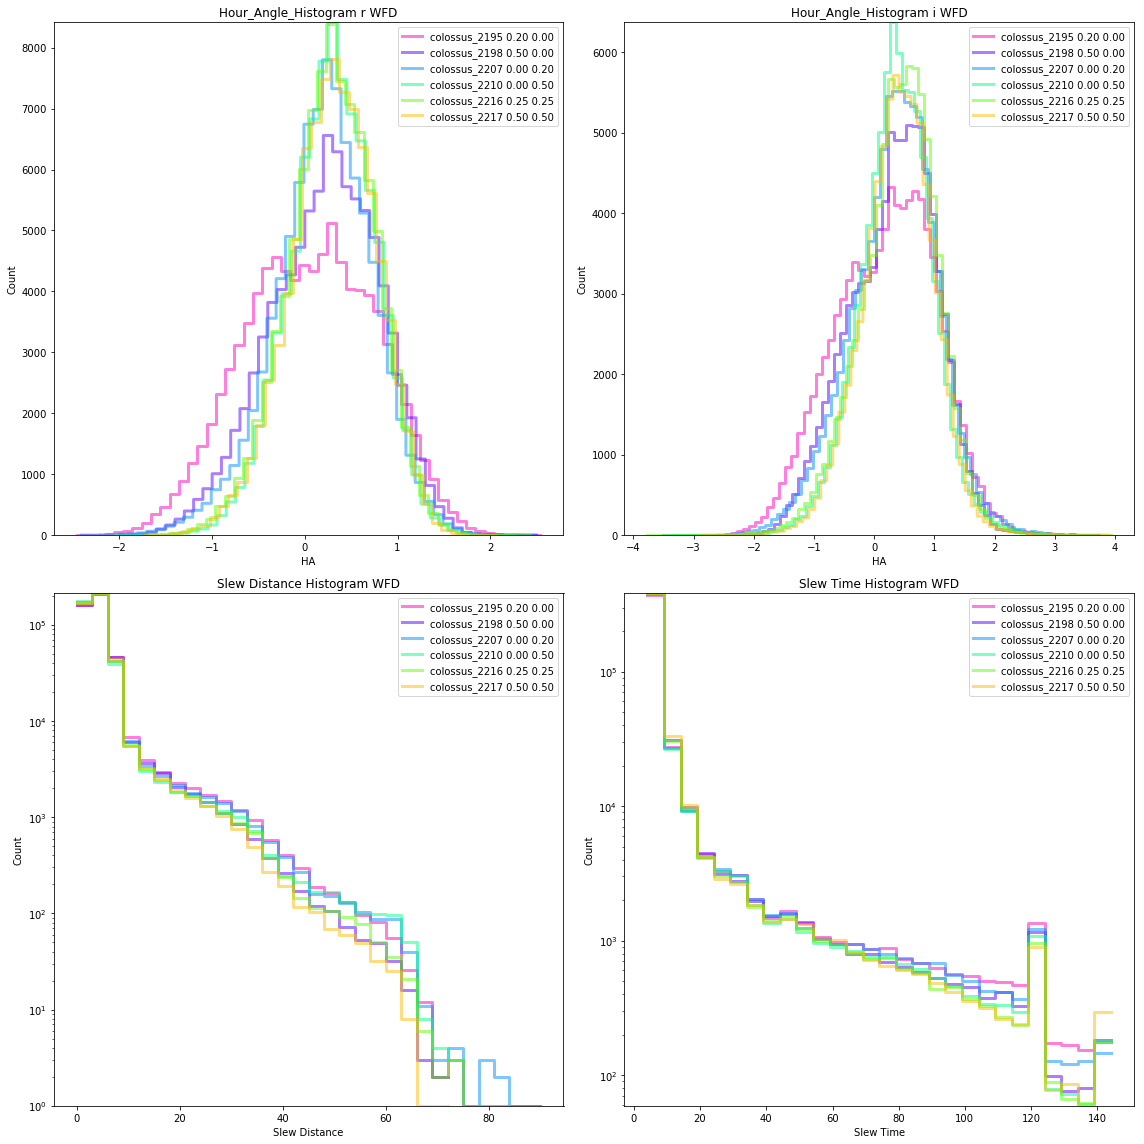

In [23]:
plt.figure(figsize=(16,16))
combo_df = stats_df.loc[['colossus_2195','colossus_2198','colossus_2207',
                         'colossus_2210','colossus_2216','colossus_2217']]
ax1 = plt.subplot(221)
overplotOneDHistograms(combo_df,['/sched/']*len(combo_df.index),
                       'Hour_Angle_Histogram','r_band_all_props',opsim=False)
ax1.set_xlabel('HA')
ax1.set_ylabel('Count')
ax1.set_title('Hour_Angle_Histogram r WFD')
ax1.legend()

ax2 = plt.subplot(222)
overplotOneDHistograms(combo_df,['/sched/']*len(combo_df.index),
                       'Hour_Angle_Histogram','i_band_all_props',opsim=False)
ax2.set_xlabel('HA')
ax2.set_ylabel('Count')
ax2.set_title('Hour_Angle_Histogram i WFD')
ax2.legend()

ax3 = plt.subplot(223)
overplotOneDHistograms(combo_df,['/sched/']*len(combo_df.index),
                       'Slew_Distance_Histogram',opsim=True,logScale=True)
ax3.set_xlabel('Slew Distance')
ax3.set_ylabel('Count')
ax3.set_title('Slew Distance Histogram WFD')
ax3.legend()

ax4 = plt.subplot(224)
overplotOneDHistograms(combo_df,['/sched/']*len(combo_df.index),
                       'Slew_Time_Histogram',opsim=True,logScale=True)
ax4.set_xlabel('Slew Time')
ax4.set_ylabel('Count')
ax4.set_title('Slew Time Histogram WFD')
ax4.legend()
plt.tight_layout()
plt.savefig('combination_comparison.pdf')

We also have a number of 10 year runs that had the same hour angle and airmass bonus values. Here we will show a comparison between those runs and their 2 year counterparts.

In [24]:
runs10 = pd.read_csv('colossus_10.csv')

In [25]:
runnames10 = []
for r in runs10['Colossus run']:
    runnames10.append('colossus_' + str(r))

In [26]:
comp10 = MafRunComparison(baseDir='.', runlist=runnames10)

In [27]:
stats_10_df,metricDict10 = comp10.combineSummaryStats('WideFastDeep',['airmass_bonus','hour_angle_bonus'])


Querying Config parameters with the following query:
paramName like "%WideFastDeep%airmass_bonus%" or paramName like "%WideFastDeep%hour_angle_bonus%"


In [28]:
stats_10_df

,airmass_bonus,hour_angle_bonus,FullRange HA g band,FullRange HA i band,FullRange HA r band,FullRange HA u band,FullRange HA y band,FullRange HA z band,Mean Slew Time,Median CoaddM5 g band,...,Median Parallax Coverage 20,Median Parallax Coverage 24,Median Slew Time,Median seeingFwhmEff i band,Median seeingFwhmEff r band,Meidan Prop. Mo. 20,Meidan Prop. Mo. 24,Nights with Observations,Total Eff Time,Total Visits
colossus_2177,0.00,0.0,7.017656,7.129850,7.122972,6.992043,7.136442,7.165341,7.344485,27.036059,...,0.679634,0.670582,4.882196,0.896476,0.931230,0.134271,1.310084,3025.0,369.376511,2407726.0
colossus_2218,0.00,0.0,6.056031,6.771565,6.663179,6.196428,6.940468,6.917391,7.375384,26.132428,...,0.684531,0.661419,4.873600,0.894435,0.916118,1.435960,14.498901,585.0,72.630141,459683.0
colossus_2185,0.25,0.0,4.420104,5.017887,4.545161,4.514085,5.792197,5.507020,9.097769,27.168546,...,0.602616,0.571671,5.412985,0.828771,0.857816,0.129570,1.056046,3025.0,457.590068,2310999.0
colossus_2195,0.20,0.0,2.401453,3.095036,2.526786,2.435489,4.898545,4.100737,9.330695,26.238059,...,0.587205,0.529235,5.427112,0.818031,0.851308,1.526122,12.897825,585.0,92.336196,439951.0
colossus_2179,0.50,0.0,3.509871,4.200852,3.723848,3.607954,5.507712,4.966415,9.039722,27.173920,...,0.586788,0.556983,5.423152,0.824119,0.852575,0.127461,1.051162,3025.0,467.542374,2314195.0
colossus_2198,0.50,0.0,2.058278,2.680086,2.062338,1.819176,4.479508,3.728432,9.033214,26.272555,...,0.571793,0.534062,5.466523,0.812383,0.835066,1.521700,12.968738,585.0,96.434540,442999.0
colossus_2176,0.00,0.5,3.697181,4.745992,4.103951,3.962414,5.841470,5.331129,8.873215,27.176965,...,0.578371,0.547741,5.421557,0.822775,0.852470,0.131141,1.083741,3025.0,469.776896,2323121.0
colossus_2210,0.00,0.5,1.629745,2.384953,1.688622,1.400338,4.771214,3.657674,8.725823,26.159562,...,0.571951,0.538051,5.407516,0.819197,0.852188,1.502694,13.508891,585.0,97.156834,446194.0


In [29]:
stats_10_df_norm= nomalizeRun(stats_10_df,['airmass_bonus','hour_angle_bonus'],'colossus_2177')

In the plots that follow one should compare the runs in paris rather than across the entire x-axis.

   * colossus_2177 to colossus_2218
   * colossus_2185 to colossus_2195
   * colossus_2179 to colossus_2198
   * colossus_2176 to colossus_2210
   
The run on the left is the 10 year run and the run on the right is the 2 year run. In these plots things have been normalized to colossus_2177 which was the 10 year run where both bonuses were set to zero.

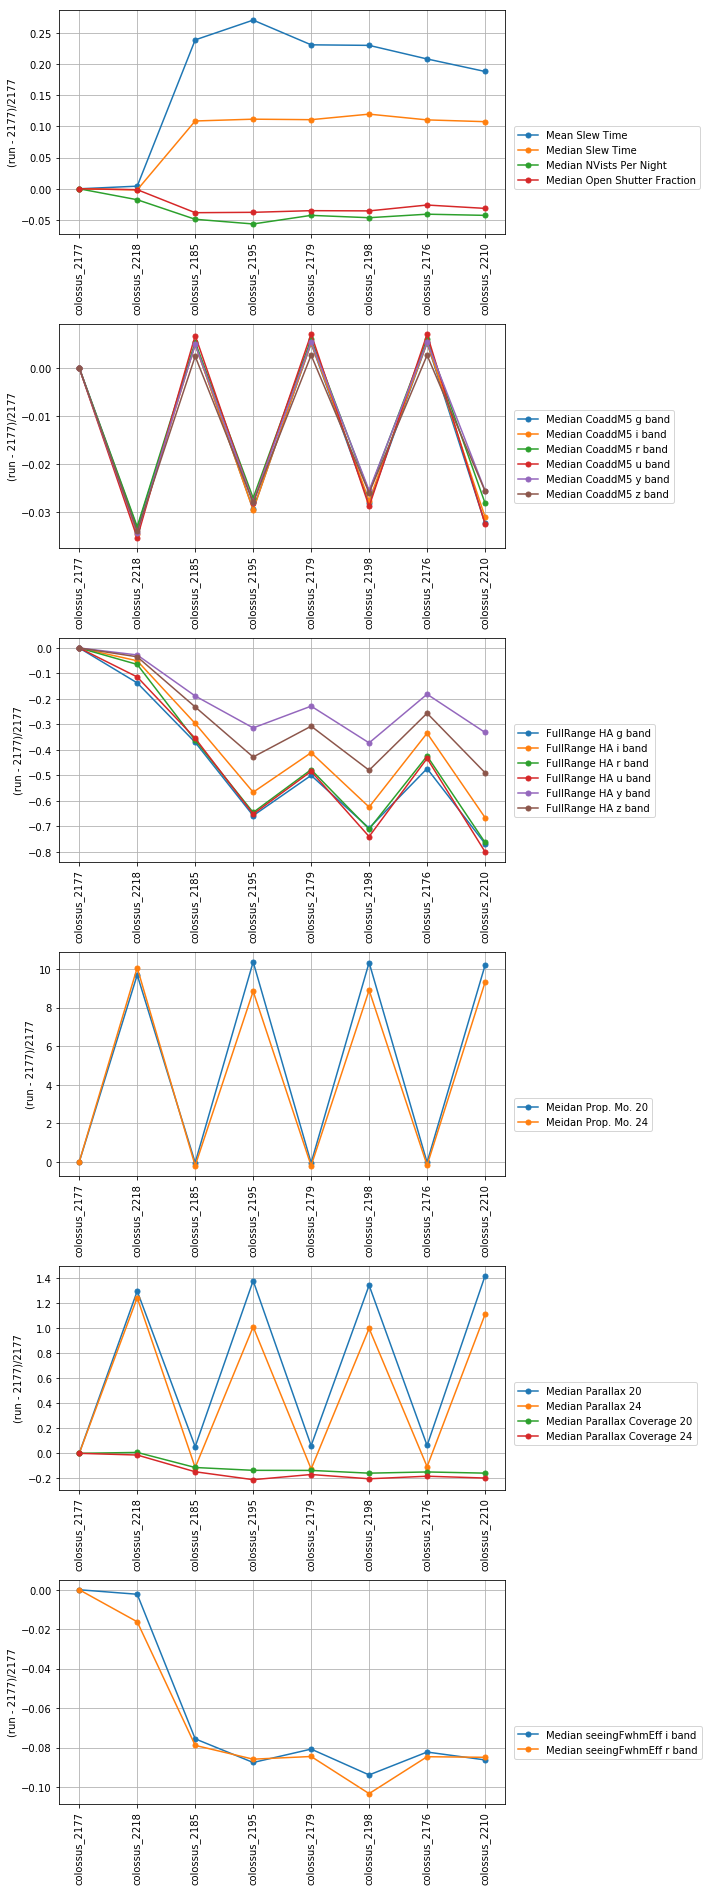

In [30]:
standardrunCompPlots(stats_10_df_norm,ylabel='(run - 2177)/2177',output=None,totalVisits=False)

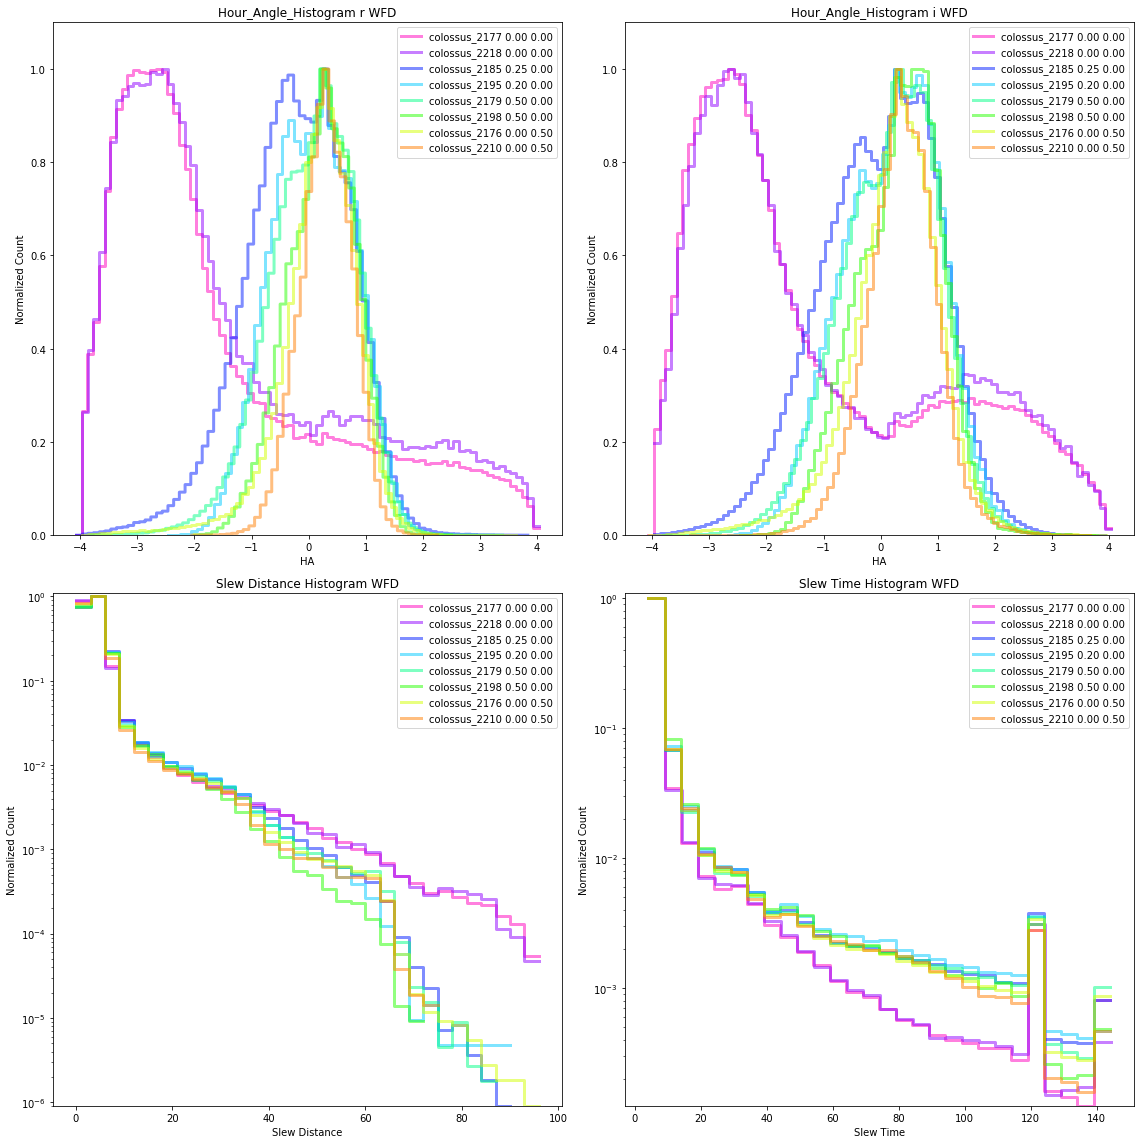

In [31]:
plt.figure(figsize=(16,16))
ax1 = plt.subplot(221)
overplotOneDHistograms(stats_10_df,['/sched/']*len(stats_10_df.index),
                       'Hour_Angle_Histogram','r_band_all_props',opsim=False,normalize=True)
ax1.set_xlabel('HA')
ax1.set_ylabel('Normalized Count')
ax1.set_title('Hour_Angle_Histogram r WFD')
ax1.legend()

ax2 = plt.subplot(222)
overplotOneDHistograms(stats_10_df,['/sched/']*len(stats_10_df.index),
                       'Hour_Angle_Histogram','i_band_all_props',opsim=False,normalize=True)
ax2.set_xlabel('HA')
ax2.set_ylabel('Normalized Count')
ax2.set_title('Hour_Angle_Histogram i WFD')
ax2.legend()

ax3 = plt.subplot(223)
overplotOneDHistograms(stats_10_df,['/sched/']*len(stats_10_df.index),
                       'Slew_Distance_Histogram',opsim=True,logScale=True,normalize=True)
ax3.set_xlabel('Slew Distance')
ax3.set_ylabel('Normalized Count')
ax3.set_title('Slew Distance Histogram WFD')
ax3.legend()

ax4 = plt.subplot(224)
overplotOneDHistograms(stats_10_df,['/sched/']*len(stats_10_df.index),
                       'Slew_Time_Histogram',opsim=True,logScale=True,normalize=True)
ax4.set_xlabel('Slew Time')
ax4.set_ylabel('Normalized Count')
ax4.set_title('Slew Time Histogram WFD')
ax4.legend()
plt.tight_layout()
plt.savefig('ten_vs_two_comparison.pdf')